# Analysis of Houses in London

In [316]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set up visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)



In [318]:
try:
    df = pd.read_csv('london_houses.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Please download the dataset from Kaggle and update the file path")

df.head(5)

Dataset loaded successfully!


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [320]:
# Display basic information
print("\n=== Dataset Info ===")
df.info()



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6),

In [322]:

# Show the first few rows
print("\n=== First 5 Rows ===")
display(df.head())




=== First 5 Rows ===


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [324]:
# Basic statistics
print("\n=== Descriptive Statistics ===")
display(df.describe(include='all'))


=== Descriptive Statistics ===


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
count,1000,1000,1000.000000,1000.000000,1000.0000,1000.00000,1000,1000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1.000000e+03
unique,770,10,NaN,NaN,NaN,NaN,2,2,NaN,3,4,3,4,5,4,3,NaN
top,91 King's Road,Kensington,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Detached House,Electric Heating,No Balcony,Classic,Sea,Wood,Renovated,NaN
freq,4,114,NaN,NaN,NaN,NaN,512,501,NaN,349,266,340,263,210,264,341,NaN
mean,NaN,NaN,3.013000,2.003000,149.6270,49.96500,NaN,NaN,1.991000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.840807e+06
std,NaN,NaN,1.393834,0.808483,58.0562,29.07086,NaN,NaN,0.821946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.793484e+05
min,NaN,NaN,1.000000,1.000000,50.0000,1.00000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.866660e+05
25%,NaN,NaN,2.000000,1.000000,99.0000,24.00000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.161400e+06
50%,NaN,NaN,3.000000,2.000000,148.0000,50.00000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.721999e+06
75%,NaN,NaN,4.000000,3.000000,201.0000,76.00000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.390500e+06


In [326]:
# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
Address            0
Neighborhood       0
Bedrooms           0
Bathrooms          0
Square Meters      0
Building Age       0
Garden             0
Garage             0
Floors             0
Property Type      0
Heating Type       0
Balcony            0
Interior Style     0
View               0
Materials          0
Building Status    0
Price (£)          0
dtype: int64


In [328]:
# Handle missing values
# For numerical columns, we'll fill with median (less sensitive to outliers)
#dataframe.select_dtypes(include, exclude)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)


Index(['Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Floors',
       'Price (£)'],
      dtype='object')


In [330]:
# For numerical columns, we'll fill with median (
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\rodri\AppData\Local\Temp\ipykernel_8624\2898398803.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [332]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Address', 'Neighborhood', 'Garden', 'Garage', 'Property Type',
       'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials',
       'Building Status'],
      dtype='object')


In [334]:
# For categorical columns, we'll fill with mode 
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\rodri\AppData\Local\Temp\ipykernel_8624\3535078076.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [336]:
print(df.isnull().sum().sum(), "missing values remaining")

0 missing values remaining


In [338]:
# Check for duplicates
print("\n=== Duplicate Rows ===")
print("Number of duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


=== Duplicate Rows ===
Number of duplicates: 0


# Exploratory Data Analysis (EDA)

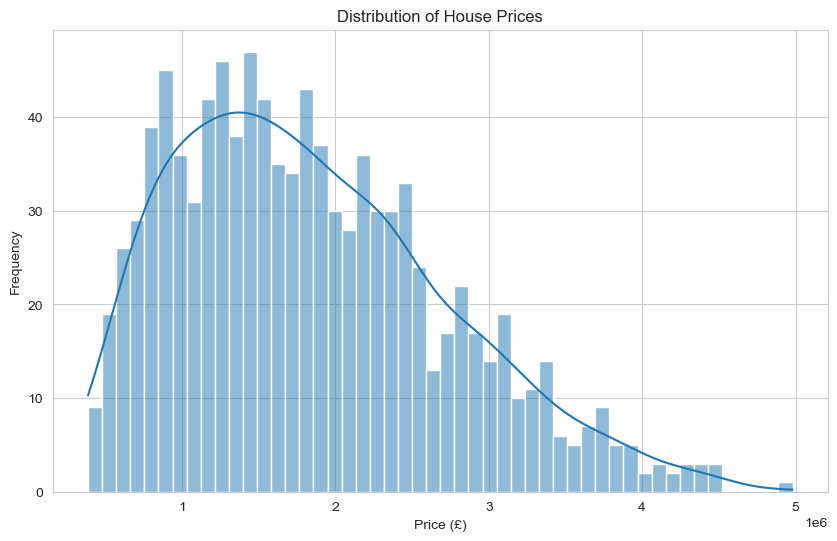

In [341]:
# Histogram of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (£)'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

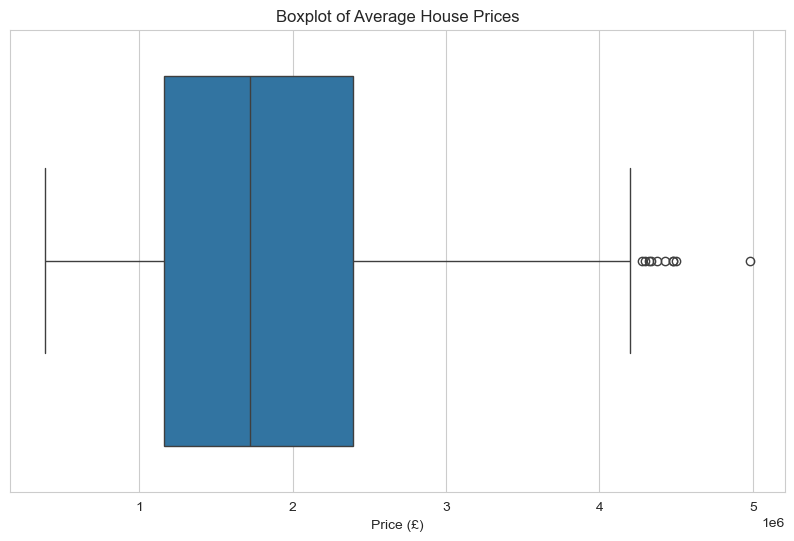

In [344]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price (£)'])
plt.title('Boxplot of Average House Prices')
plt.show()

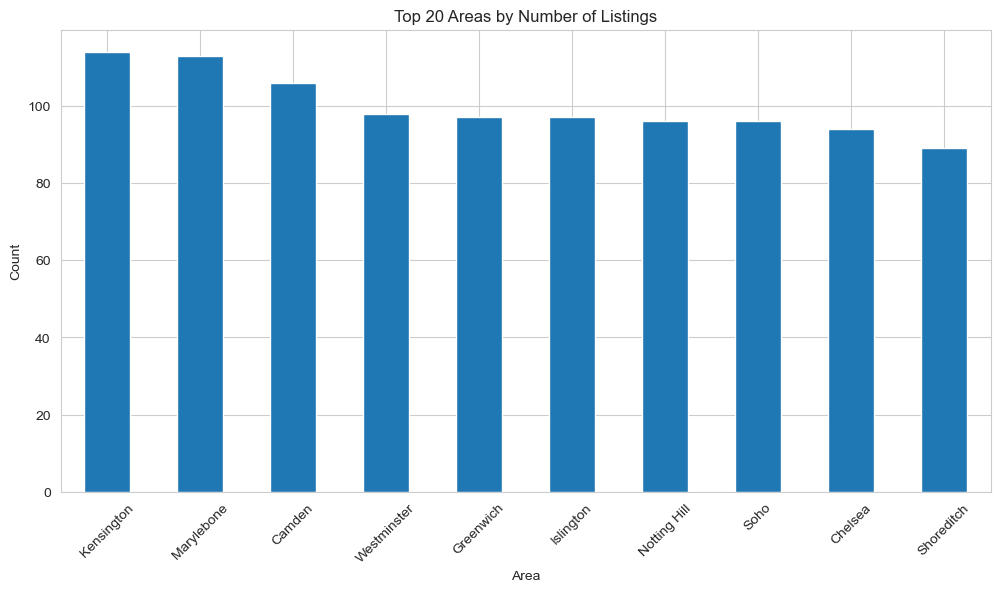

In [346]:
# Count of observations by area
plt.figure(figsize=(12, 6))
df['Neighborhood'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Areas by Number of Listings')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

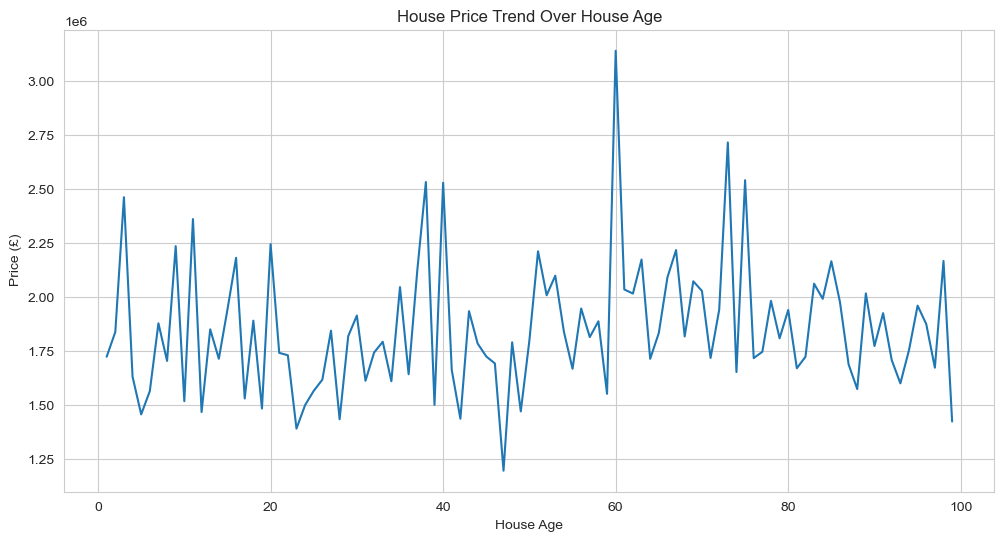

In [348]:
# Price trends over time
plt.figure(figsize=(12, 6))
df.groupby('Building Age')['Price (£)'].mean().plot()
plt.title('House Price Trend Over House Age')
plt.xlabel('House Age')
plt.ylabel(' Price (£)')
plt.show()


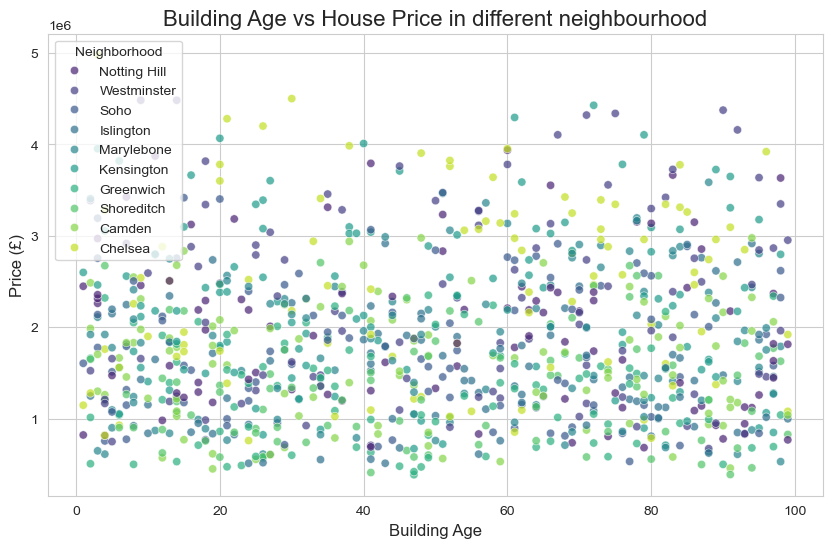

In [350]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Building Age', y='Price (£)', data=df, hue='Neighborhood', palette='viridis', alpha=0.7)
plt.title("Building Age vs House Price in different neighbourhood", fontsize=16)
plt.xlabel("Building Age", fontsize=12)
plt.ylabel("Price (£)", fontsize=12)
plt.show()

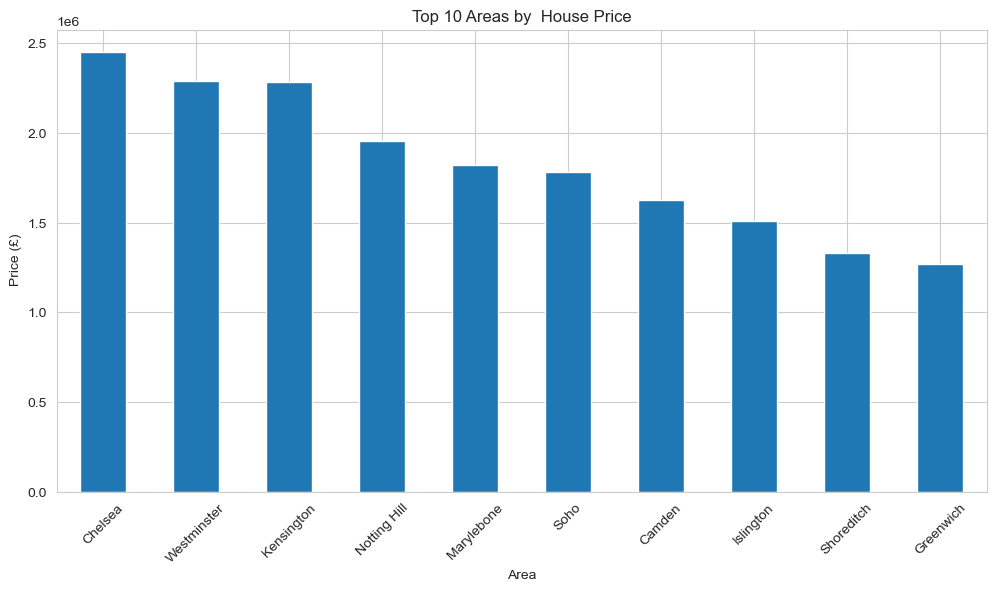

In [351]:
# Average price by area (top 10)
plt.figure(figsize=(12, 6))
df.groupby('Neighborhood')['Price (£)'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Areas by  House Price')
plt.xlabel('Area')
plt.ylabel(' Price (£)')
plt.xticks(rotation=45)
plt.show()

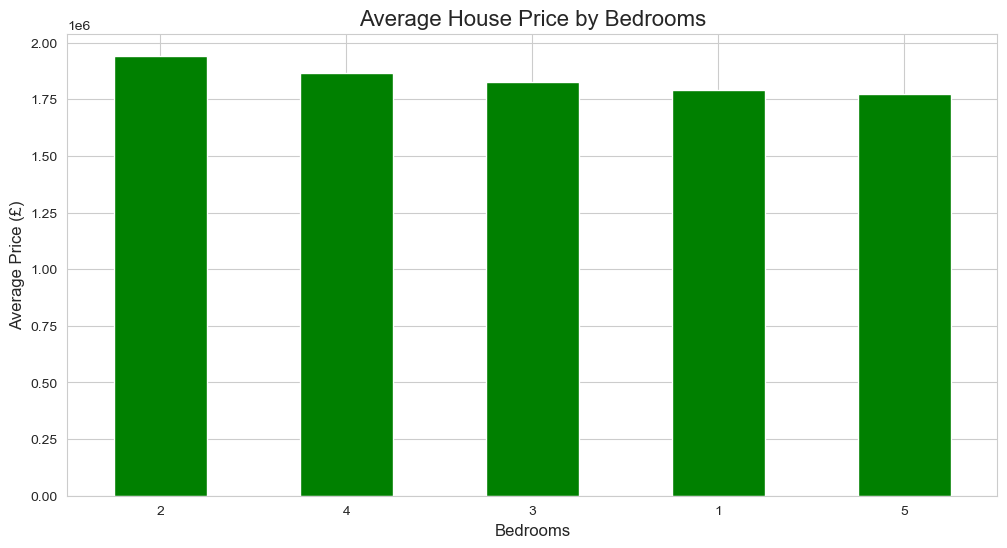

In [354]:
bedroom_prices = df.groupby('Bedrooms')['Price (£)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
bedroom_prices.plot(kind='bar', color='green')
plt.title("Average House Price by Bedrooms", fontsize=16)
plt.xlabel("Bedrooms", fontsize=12)
plt.ylabel("Average Price (£)", fontsize=12)
plt.xticks(rotation=0)
plt.show()

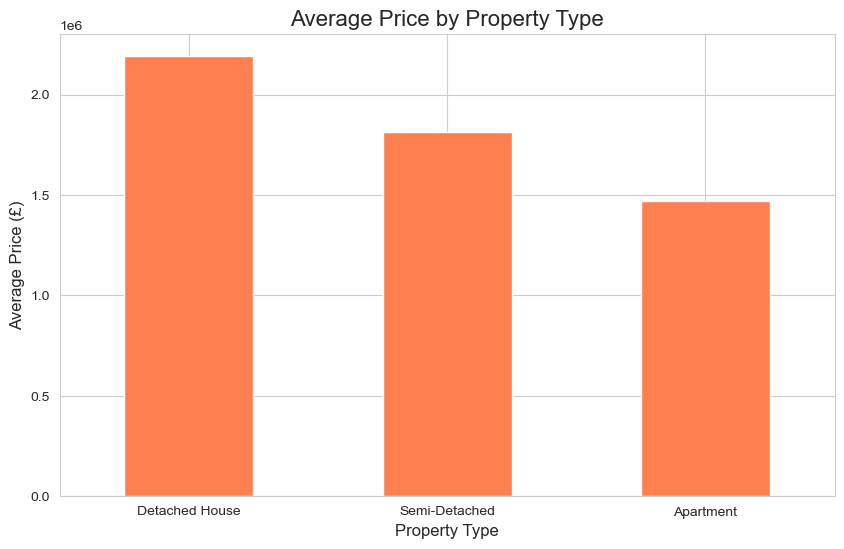

In [356]:
property_prices = df.groupby('Property Type')['Price (£)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
property_prices.plot(kind='bar', color='coral')
plt.title("Average Price by Property Type", fontsize=16)
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Average Price (£)", fontsize=12)
plt.xticks(rotation=0)
plt.show()

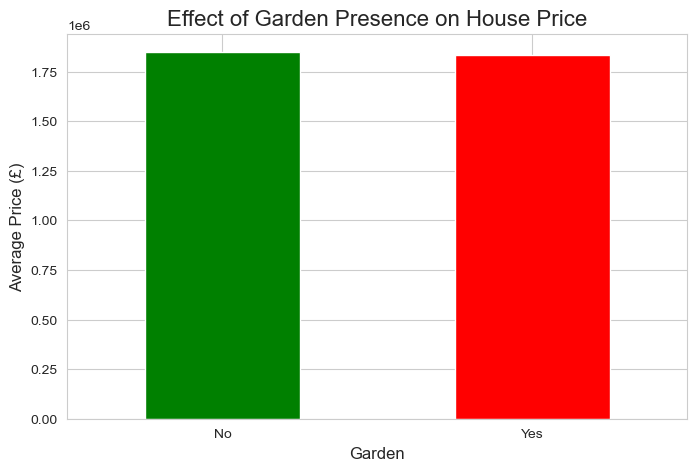

In [358]:
garden_price = df.groupby('Garden')['Price (£)'].mean()
plt.figure(figsize=(8, 5))
garden_price.plot(kind='bar', color=['green', 'red'])
plt.title("Effect of Garden Presence on House Price", fontsize=16)
plt.xlabel("Garden", fontsize=12)
plt.ylabel("Average Price (£)", fontsize=12)
plt.xticks(rotation=0)
plt.show()

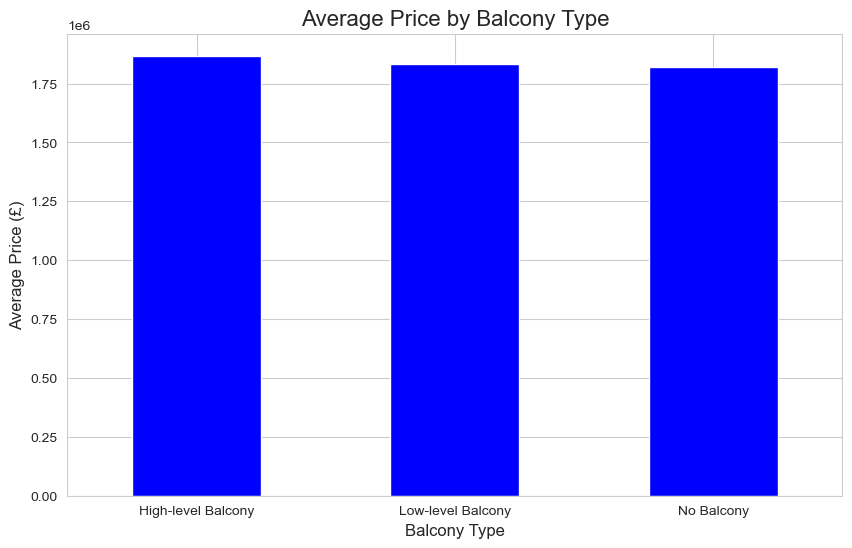

In [360]:
balcony_prices = df.groupby('Balcony')['Price (£)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
balcony_prices.plot(kind='bar', color='blue')
plt.title("Average Price by Balcony Type", fontsize=16)
plt.xlabel("Balcony Type", fontsize=12)
plt.ylabel("Average Price (£)", fontsize=12)
plt.xticks(rotation=0)
plt.show()

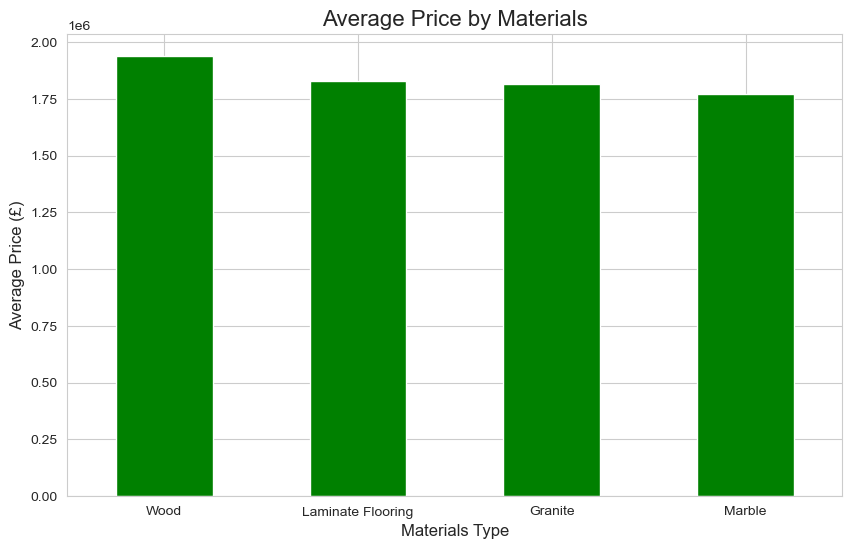

In [362]:
Materials_prices = df.groupby('Materials')['Price (£)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
Materials_prices.plot(kind='bar', color='green')
plt.title("Average Price by Materials", fontsize=16)
plt.xlabel("Materials Type", fontsize=12)
plt.ylabel("Average Price (£)", fontsize=12)
plt.xticks(rotation=0)
plt.show()

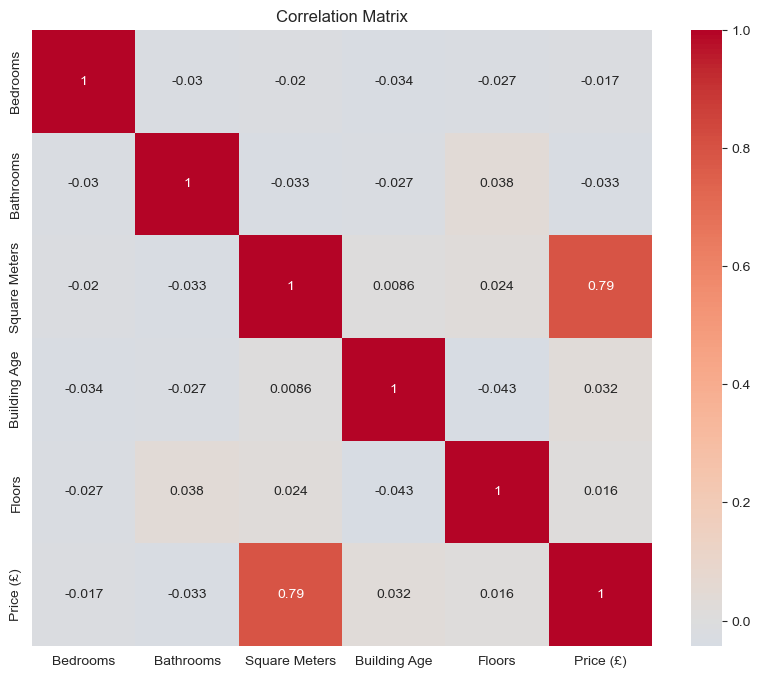

In [364]:
# Correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [366]:
# Create a price per room feature (if number of rooms data exists)
if 'Bedrooms' in df.columns:
    
    df['price_per_room'] = df['Price (£)'] / df['Bedrooms']

print(df.price_per_room)



0      1145600.00
1       738000.00
2       376320.00
3       379200.00
4       381000.00
          ...    
995    1166400.00
996     563333.00
997     496599.75
998     340600.00
999     585833.25
Name: price_per_room, Length: 1000, dtype: float64


Text(0, 0.5, 'Frequency')

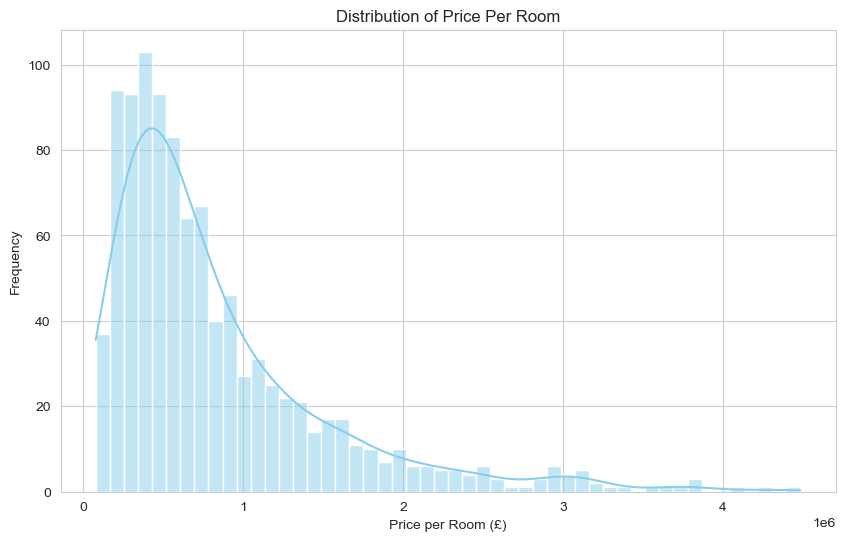

In [368]:
 #Distribution of price per room

sns.histplot(df['price_per_room'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Price Per Room')
plt.xlabel('Price per Room (£)')
plt.ylabel('Frequency')
    
  
    

C:\Users\rodri\AppData\Local\Temp\ipykernel_8624\969711993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


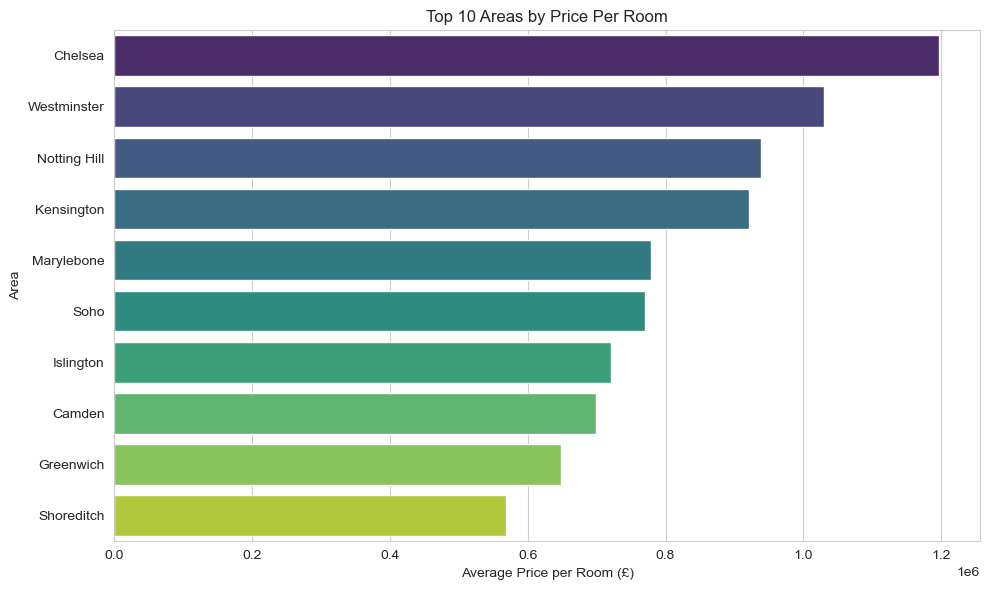

In [370]:
#: Price per room by area (top 10 areas)

top_areas = df.groupby('Neighborhood')['price_per_room'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title('Top 10 Areas by Price Per Room')
plt.xlabel('Average Price per Room (£)')
plt.ylabel('Area')
    
plt.tight_layout()
plt.show()